# Telco Churn Analysis

## Goals
- To discover the main drivers of churn within Telco
- Use the drivers to develop a ML program that predicts churn with at least 80% accuracy
- Deliver a report to a non techinical supervisor in a digestable manner

In [1]:
import pandas as pd
import seaborn as sns
import new_lib as nl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import acquire as a
import prepare as p

## Acquire
- Data acquired from Telco
- Each row represents a single customer
- Columns represent the different information concering each customer

## Preperation
- Removed any unecessary columns
- Changing data types into workable form
- Removed any null values
- Specified target variable
- Split data into train test validate sets
- Created functions for replication of experiment

In [2]:
telco = a.data('telco')
telco.head()
#Aquired data and briefly look to make sure its correct

,payment_type_id,contract_type_id,dependents,tenure,monthly_charges,total_charges,churn,contract_type,payment_type
0,2,2,Yes,9,65.6,593.30,No,One year,Mailed check
1,2,1,No,9,59.9,542.40,No,Month-to-month,Mailed check
2,1,1,No,4,73.9,280.85,Yes,Month-to-month,Electronic check
3,1,1,No,13,98.0,1237.85,Yes,Month-to-month,Electronic check
4,2,1,No,3,83.9,267.40,Yes,Month-to-month,Mailed check


In [3]:
telco.describe()
# sumerrized data that we have acquired

,payment_type_id,contract_type_id,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,32.371149,64.761692,2279.734304
std,1.148907,0.833755,24.559481,30.090047,2266.794470
min,1.000000,1.000000,0.000000,18.250000,0.000000
25%,1.000000,1.000000,9.000000,35.500000,398.550000
50%,2.000000,1.000000,29.000000,70.350000,1394.550000
75%,3.000000,2.000000,55.000000,89.850000,3786.600000
max,4.000000,3.000000,72.000000,118.750000,8684.800000


## Explore

### Does contract type impact churn?

In [4]:
p.chi2('contract_type_id', telco)
# chi2 test for contract type
# find that it is also incredibly relevant to churn

Comparing relationship between churn and contract_type_id
1184.5965720837926 5.863038300673391e-258
------------------




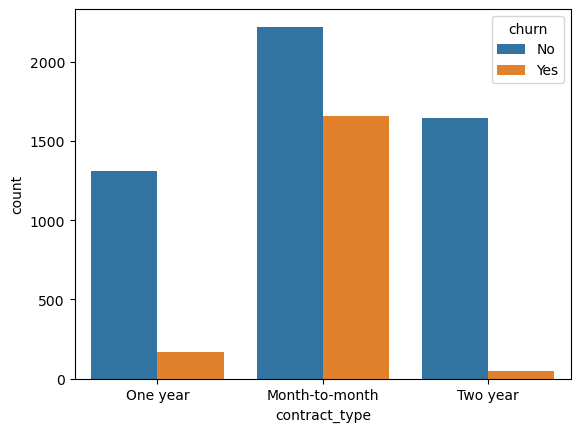

In [5]:
p.contract_plot(telco, 'contract_type', 'churn')
# count plot for contract type that shows the count of churned

- As you can see, Month to Month contracts have by far the greatest churn
- The statistical test combined with the visual show that this is an excellent driver for churn

### Does payment type impact churn?

In [6]:
p.chi2('payment_type_id', telco)
# chi2 test for payment_types
# find that it is incredibly relevant

Comparing relationship between churn and payment_type_id
648.1423274814 3.6823546520097993e-140
------------------




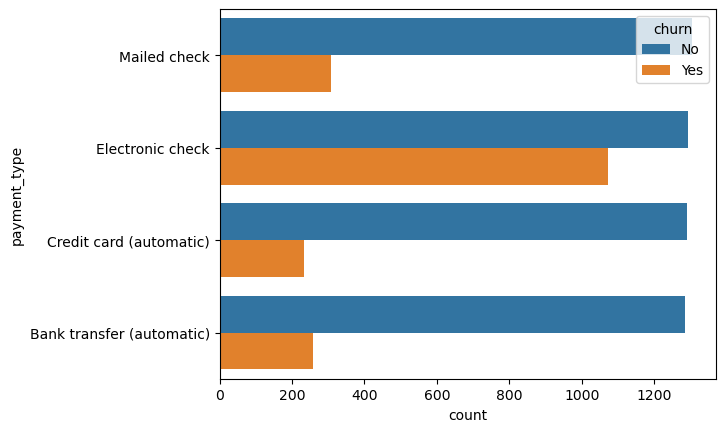

In [7]:
p.payment_plot(telco, 'payment_type', 'churn')
# payment type plot

- This shows another strong indicator of churn
- Electronic checks are by far the most likely customers to churn
- This is another great driver for churn
- The company should consider why so many people who pay using check are leaving

### Does dependents status impact churn?

In [8]:
p.chi2('dependents', telco)
# chi2 test for dependents
# it is also very relevant but not as much as the other two chi2 tests

Comparing relationship between churn and dependents
189.12924940423474 4.9249216612154196e-43
------------------




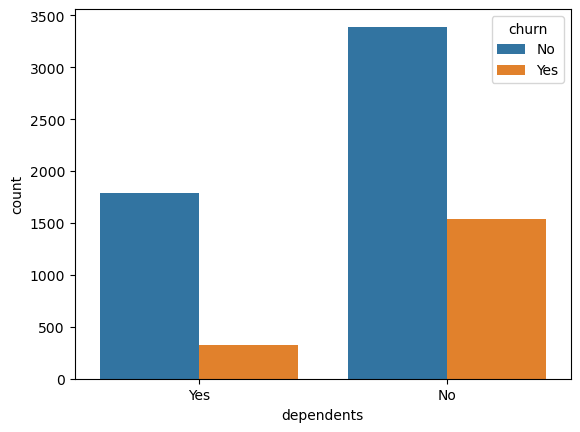

In [9]:
p.dependents_plot(telco, 'dependents', 'churn')
# creating a dependents count plot

- While this is a less valuable indicator than the previous two, there is still a large gap indicating churn
- Likely the reason for not churn could be that having a dependent leads to multiple lines and older individuals who prefer stability and loyalty to a brand
- The company should consider this,  however it isnt the most important indicator

### Do monthly charges impact churn?

In [10]:
p.t_test('monthly_charges', telco)
# t_test for monthly charges
# it is very relevant to churn

Comparing relationship between churn and monthly_charges
18.407526676414673 8.59244933154705e-73
------------------




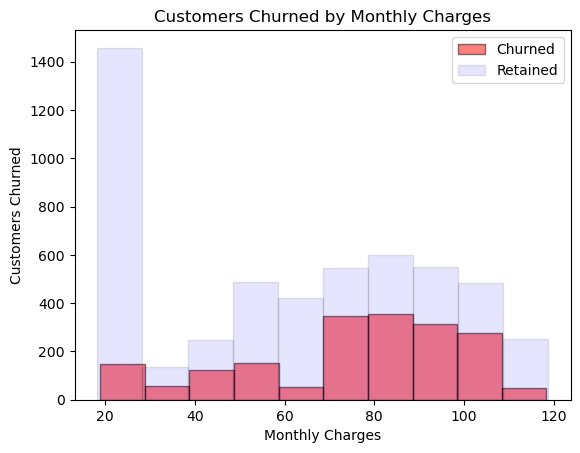

In [11]:
p.hist_plot(telco, 'churn', 'monthly_charges', 'red', 'blue', .5, .1, 'black', 'Churned', 'Retained', 
            'Monthly Charges', 'Customers Churned', 'Customers Churned by Monthly Charges')

- A clear trend of churn increasing as monthly charges reaches around 70 can be seen
- The overlayed histogram also shows a strong outlier of under 30 a month accounting for most of the customers
- Company should pay attention to not only what is causing the churn but also the vast range of monthly charges

## Do total charges impact churn?

In [12]:
p.t_test('total_charges', telco)
# t_test for total charges
# it is also very relevant to churn

Comparing relationship between churn and total_charges
-18.70661828817703 5.902580609073978e-75
------------------




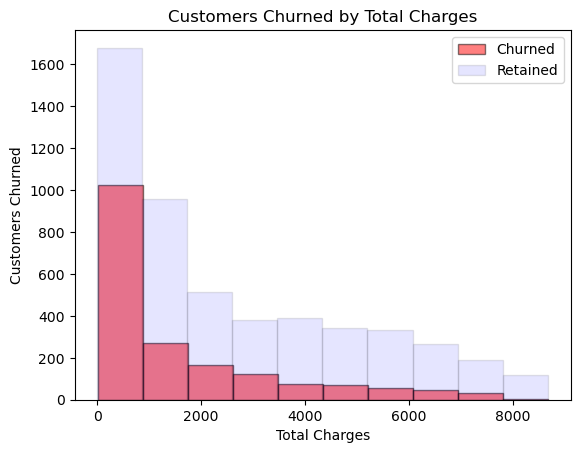

In [13]:
p.hist_plot(telco, 'churn', 'total_charges', 'red', 'blue', .5, .1, 'black', 'Churned', 'Retained', 
            'Total Charges', 'Customers Churned', 'Customers Churned by Total Charges')

- As expected customers with higher total charges tend not to churn
- This is the result of longer contracts meaning that they are already committed to the company long term
- Not a great indicator of churn as this is more of an indicator of what contract type customers might have

### What is the best indicator of churn?
- It appears that contract type is the best indicator of churn

## Exploration Summary

- Every single feature seems to have some level of relevance to churn
- Contract type is the best predictor
- While my hypothesis that customers with dependents would churn less is true, it is the least important driver in the feature set chosen

## Modeling

### Moving forward with all features to modeling since they are all relevant to a high degree

#### Accuracy is the evaluation metric
#### The goal is to get 80% accuracy

In [14]:
p.baseline(telco, 'churn')
# Creating a baseline for the models to compare against

0.7346301292063041

Creating a baseline to evaluate the models against
The goal is to improve to 80%

In [15]:
p.make_binary(telco, 'dependents')

In [16]:
telco = p.drop_cols(telco, 'contract_type', 'payment_type', 1)

In [17]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = p.data_split(telco, 'churn')
# split the data into train validate and test sets
X_train

,payment_type_id,contract_type_id,dependents,tenure,monthly_charges,total_charges
1320,2,1,0,1,20.40,20.40
6590,2,1,0,4,20.70,73.05
3490,3,1,0,28,59.55,1646.45
4745,3,3,1,60,20.95,1270.55
3268,4,3,0,63,79.85,4861.45
...,...,...,...,...,...,...
4890,1,1,0,4,91.65,365.40
1831,4,1,0,41,81.30,3190.65
4341,2,1,0,1,19.75,19.75
996,1,3,0,57,95.25,5464.65


## Decision Tree

DecisionTreeClassifier(max_depth=7, random_state=77)

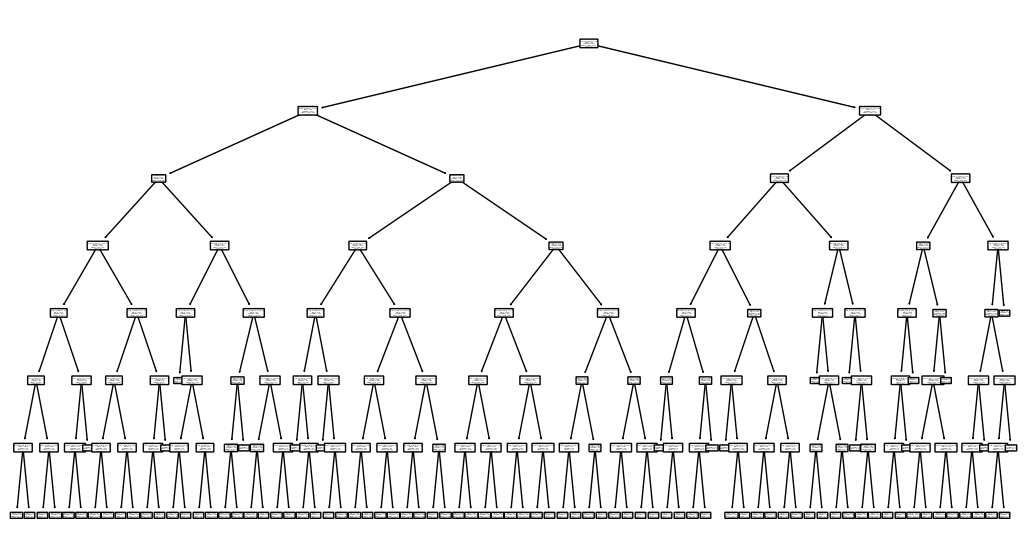

In [21]:
p.dec_tree(X_train, y_train, 7, X_train, y_train)
# create and visualize a decision tree on the train set

Found that depth 7 leads to the most accurate results without overfitting the model

In [22]:
p.tree_score(X_test, y_test, 7, X_train, y_train)
# tests the model on the test set

0.7899219304471257

Decision tree model results in 79% accuracy
While it is a 5% increase from the baseline it is not a huge improvment

In [23]:
p.tree_matrix(X_test, y_test, 7, X_train, y_train)
# creates a decision matrix from the test set

,No,Yes
No,896,139
Yes,157,217


- The confusion matrix shows the numerical results of all the test set customers
- While the False negative is rather low, the false positive is pretty high

In [25]:
p.tree_report(X_test, y_test, 7, X_train, y_train)
# Creates a comprehensive report that details all other scores not just accuracy

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1035
         Yes       0.61      0.58      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



## Random Forest

In [31]:
p.ran_score(X_test, y_test, 7, X_train, y_train)
# Create a random forest score for the test set

0.7892122072391767

Creates a random forest test score. Using the test set the accuracy is also about 79% which is a 5% improvement from baseline

In [32]:
p.ran_matrix(X_test, y_test, 7, X_train, y_train)
# Creates a matrix detailing the random forest predictions

,No,Yes
No,924,111
Yes,186,188


Matrix that shows the predictions based on the random forest model, like the decision tree it also has a concerningly high amount of false positives

In [33]:
p.ran_report(X_test, y_test, 7, X_train, y_train)
# Creates a comprehensive report for the random forest model

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## Logistic Regression

In [35]:
p.log_reg_score(X_test, y_test, 1, X_train, y_train)
# Creates a model and accuracy score for a logistical regression model

0.7877927608232789

This model scores a 78% accuracy making the models all within 1% of each other

In [36]:
p.log_matrix(X_test, y_test, 1, X_train, y_train)
# Creates a matrix for the logistical regression model

,No,Yes
No,918,117
Yes,182,192


This model as well has a high rate of false positives

In [37]:
p.log_report(X_test, y_test, 1, X_train, y_train)
# Creates the comprehensive report for the logistical regression model

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## Modeling Summary

The most accurate model was the decision tree model with 79% accuracy

The random forest model was also quite accurate at 79% however the logistical regression was less accurate at 78.7%

All models did a good job of prediciting retention however they all struggled to accurately predict churn

## Conclusion

### Exploration

- The feature set selected all were relevant to the target
- Based on the visuals and statistics tests there are some very clear trends among the data
- The contract type seems to be the best indicator of churn

### Modeling

- None of the models significantly outperformed the baseline
- The models all failed to reach the 80% goal also
- The models also all failed to account for false positives very well
- Perhaps the models would be better at accounting for false positives 

### Recommendations

- The company should recognize that the contract type the customer signs will greatly influence their retention rate
- The company should consider how best to incentivize customers to sign long term contracts
- The company should also consider how to standardize monthly costs as well to increase stability

### Next Steps

- The next steps would be to consider which other drivers might better produce models that can predict accuracy higher than 80%
- We should also consider ways to better graph and represent total and monthly costs
- I would also like to take a deeper dive into why exactly the false positive rate is so high in all the models